In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn import metrics
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

/Users/Rattlehead/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv("/Users/Rattlehead/Downloads/GreatLakes/Bank_Personal_Loan_Modelling-1.csv")

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.isnull().values.any()

False

In [9]:
#ID is not required for clasification so we can drop it
df.drop(["ID"], axis=1, inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Continuous Variables: Age, Experience, Income, CCAvg

Categorical Variables: ZIP Code, Family, Education, Mortgage, Securities Account, CD Account, Online, CreditCard

Target Variable: Personal Loan

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c194acf98>,
      dtype=object)

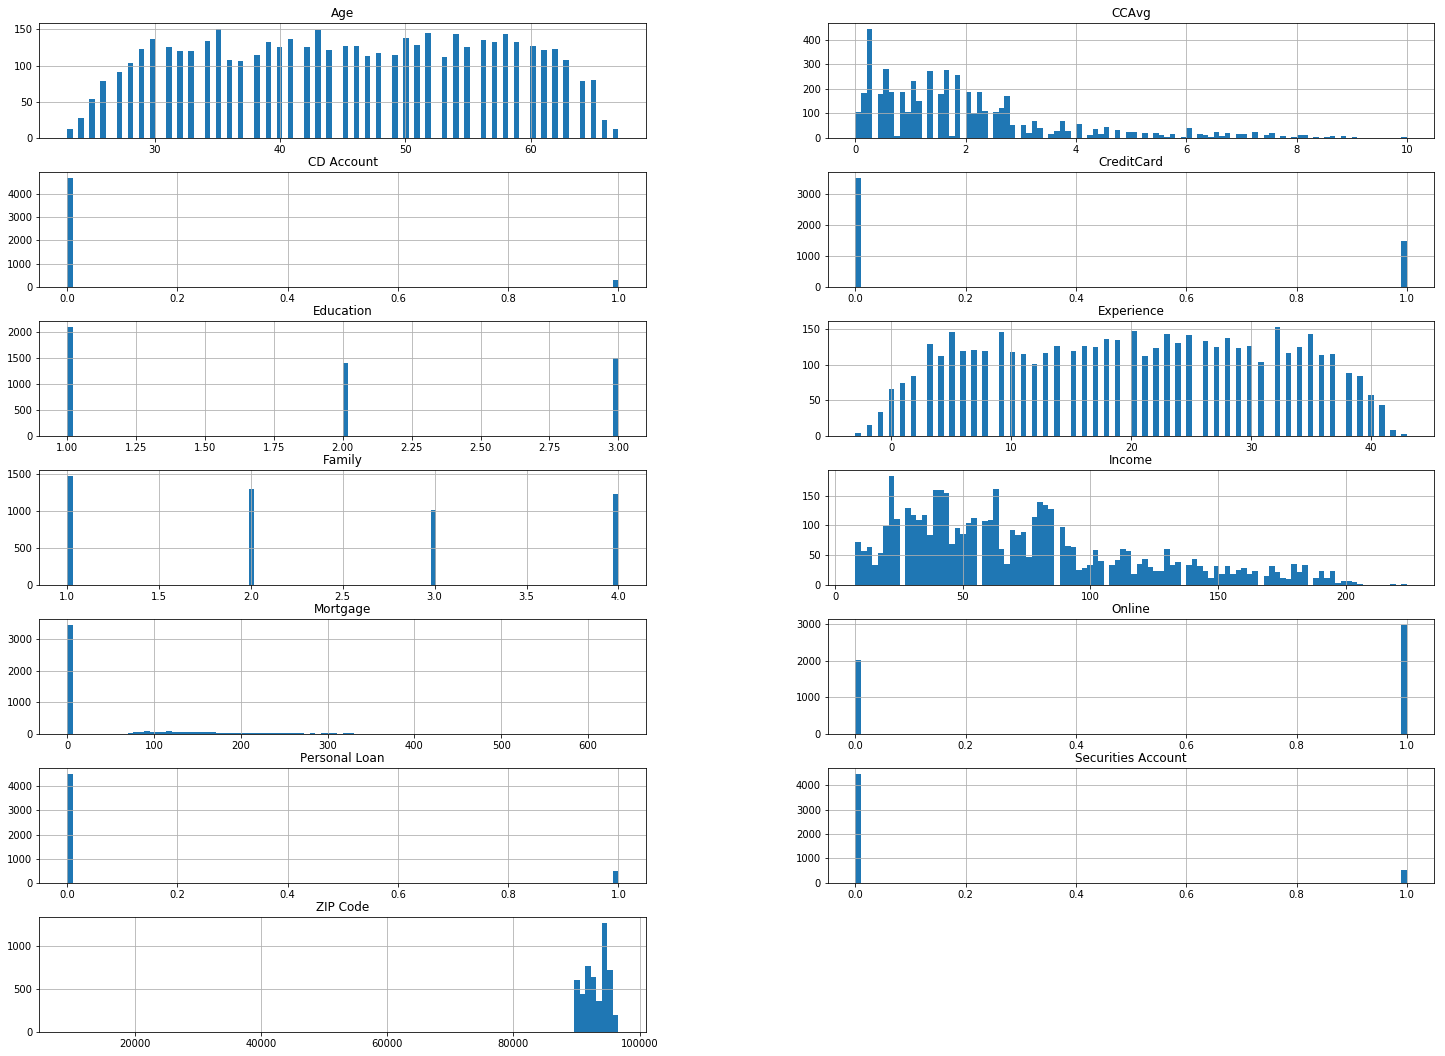

In [10]:
columns = list(df);
df[columns].hist(stacked=False, bins=100, figsize=(25,35), layout=(13,2))

Age: We have majority of customers within the age group 0f 30-60

CD Account: Majority of the customers does not have certificate of deposit account

Education: We have highs of 1(Undergrad) and 3(Advanced/Professional)

Family: We see majority of singles and couples

Mortgage: We see high value of 0s but we observe non-zero values as well. It will be good to see the unique values for           this column

Personal Loan: Very few customers have availed personal loan

Zip Code: We see customers grouped based on regional zip code

CCAvg: We see distribution of avg credit card expenditure between 0dollar to 10000dollars

Credit Card: Majority of customers do not hold credit card issued by UniversalBank

Experience: We have distribution of customers from 0 years of experience to 43 years of exp

Income: We see distribution of Income upto more than 200000dollars

Online: Majority of customers use internet banking facilities

Securities Account: Majority of customers do not have securities account

In [11]:
#Number of unique values for Mortgage
df.iloc[:,7].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

As we can see there are quite a number of unique values for Mortgage, so Mortgage should be considered as continuous variable

Continuous Variables: Age, Experience, Income, CCAvg, Mortgage

Categorical Variables: ZIP Code, Family, Education, Securities Account, CD Account, Online, CreditCard

Target Variable: Personal Loan

In [12]:
#Check the correlation
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [13]:
#Check the variance
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.var()

Age                      131.40417
Experience               131.51396
Income                  2119.10424
ZIP Code             4502256.74734
Family                     1.31713
CCAvg                      3.05431
Education                  0.70538
Mortgage               10345.69754
Personal Loan              0.08680
Securities Account         0.09352
CD Account                 0.05676
Online                     0.24068
CreditCard                 0.20761
dtype: float64

Since the variance of Securities Account and CD Account is less than 0.1, we can drop them

In [14]:
df.drop(["Securities Account", "CD Account"], axis=1, inplace=True, errors='ignore')

In [15]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Online,CreditCard
0,25,1,49,91107,4,1.60000,1,0,0,0,0
1,45,19,34,90089,3,1.50000,1,0,0,0,0
2,39,15,11,94720,1,1.00000,1,0,0,0,0
3,35,9,100,94112,1,2.70000,2,0,0,0,0
4,35,8,45,91330,4,1.00000,2,0,0,0,1


Text(0.5,0,'Age')

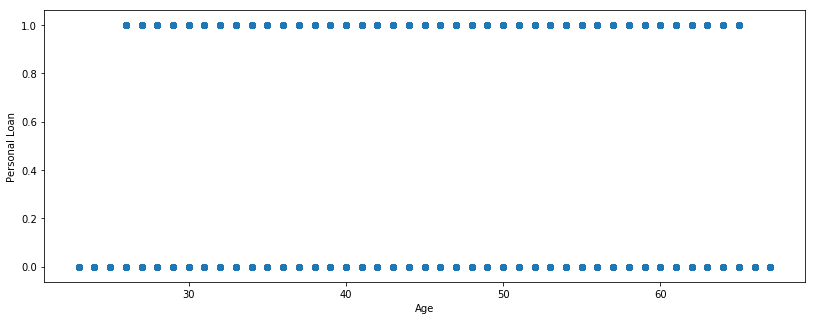

In [16]:
#SubPlot for Personal Loan against Age
plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
plt.scatter(df['Age'], df['Personal Loan'])
plt.ylabel('Personal Loan')
plt.xlabel('Age')

Text(0.5,0,'#years of professional Experience')

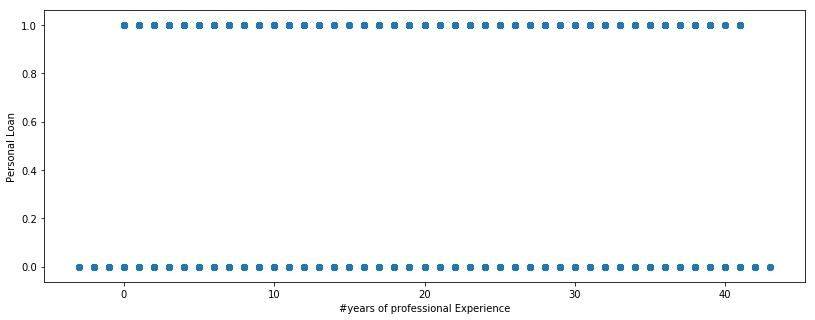

In [17]:
#SubPlot for Personal Loan against Experience
plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
plt.scatter(df['Experience'], df['Personal Loan'])
plt.ylabel('Personal Loan')
plt.xlabel('#years of professional Experience')

Text(0.5,0,'Income')

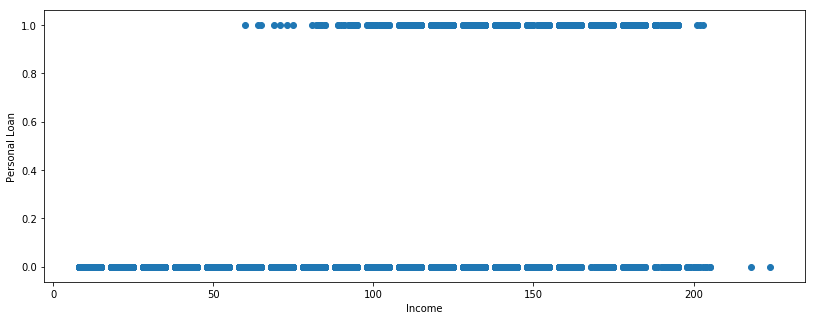

In [18]:
#SubPlot for Personal Loan against Income
plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
plt.scatter(df['Income'], df['Personal Loan'])
plt.ylabel('Personal Loan')
plt.xlabel('Income')

Text(0.5,0,'ZIP Code')

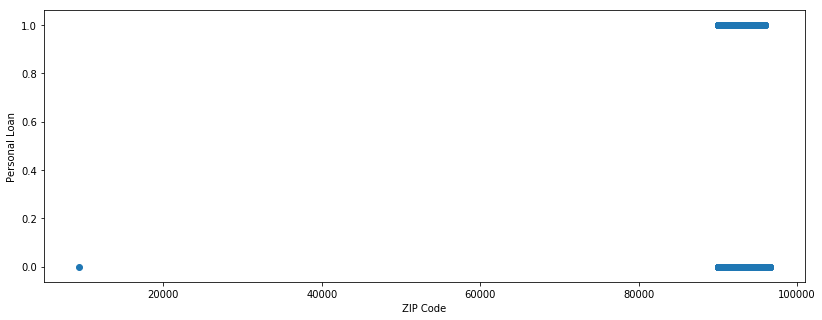

In [19]:
#SubPlot for Personal Loan against Zip Code
plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
plt.scatter(df['ZIP Code'], df['Personal Loan'])
plt.ylabel('Personal Loan')
plt.xlabel('ZIP Code')

Text(0,0.5,'Personal Loan')

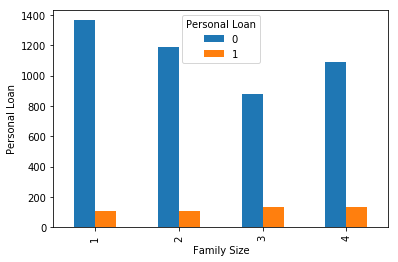

In [20]:
#Crosstab for Personal Loan against Family
pd.crosstab(df.Family,df["Personal Loan"]).plot(kind='bar')
plt.xlabel('Family Size')
plt.ylabel('Personal Loan')

Family seems to be good predictor of outcome variable

Text(0.5,0,'CCAvg')

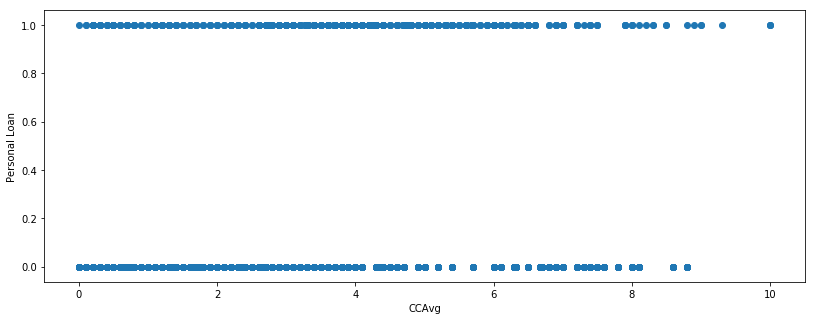

In [21]:
#SubPlot for Personal Loan against CCAvg
plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
plt.scatter(df['CCAvg'], df['Personal Loan'])
plt.ylabel('Personal Loan')
plt.xlabel('CCAvg')

Text(0,0.5,'Personal Loan')

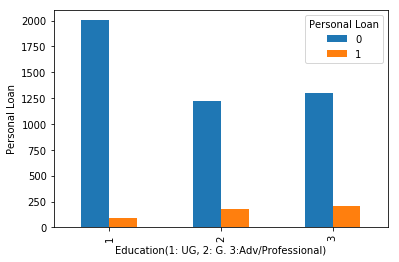

In [22]:
#Crosstab for Personal Loan against Education
pd.crosstab(df.Education,df["Personal Loan"]).plot(kind='bar')
plt.xlabel('Education(1: UG, 2: G. 3:Adv/Professional)')
plt.ylabel('Personal Loan')

Education seems to be good predictor of the outcome variable

Text(0.5,0,'Mortgage')

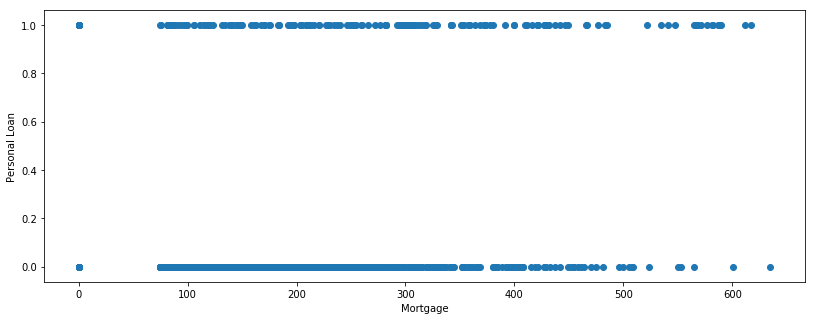

In [23]:
#SubPlot for Personal Loan against Mortgage
plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
plt.scatter(df['Mortgage'], df['Personal Loan'])
plt.ylabel('Personal Loan')
plt.xlabel('Mortgage')

Text(0,0.5,'Personal Loan')

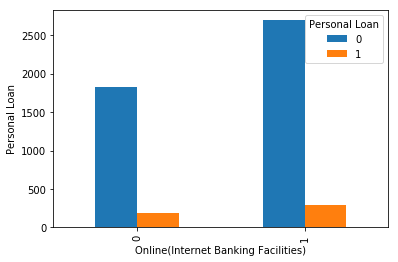

In [24]:
#Crosstab for Personal Loan against Online
pd.crosstab(df.Online,df["Personal Loan"]).plot(kind='bar')
plt.xlabel('Online(Internet Banking Facilities)')
plt.ylabel('Personal Loan')

Online seems to be a good predictor of outcome variable

Text(0,0.5,'Personal Loan')

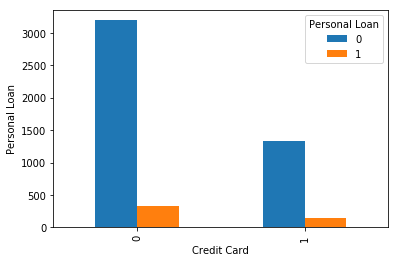

In [25]:
#Crosstab for Personal Loan against Online
pd.crosstab(df.CreditCard,df["Personal Loan"]).plot(kind='bar')
plt.xlabel('Credit Card')
plt.ylabel('Personal Loan')

Credit Card seeems to be a good predictor of outcome variable

In [26]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Online,CreditCard
0,25,1,49,91107,4,1.60000,1,0,0,0,0
1,45,19,34,90089,3,1.50000,1,0,0,0,0
2,39,15,11,94720,1,1.00000,1,0,0,0,0
3,35,9,100,94112,1,2.70000,2,0,0,0,0
4,35,8,45,91330,4,1.00000,2,0,0,0,1


In [27]:
# Transform data into features and target
vars = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Online', 'CreditCard']
X = np.array(df[vars])
Y = np.array(df['Personal Loan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [28]:
#Logit
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.144892
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.529      
Dependent Variable: y                AIC:              1036.2472  
Date:               2019-11-27 01:15 BIC:              1104.0129  
No. Observations:   3500             Log-Likelihood:   -507.12    
Df Model:           10               LL-Null:          -1077.3    
Df Residuals:       3489             LLR p-value:      1.0734e-238
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
--------------------------------------------------------------------
          Coef.     Std.Err.      z      P>|z|     [0.025     0.975]
--------------------------------------------------------------------
const    -10.2581     3.7818   -2.7125   0.0067   -17.6702   -2.8460
x1        -0.0637     0.0673   -0.9468   0.3437    -0.1957    0.0682
x2         0.0789     0.0669    1.1789   0.2384    -0.0522    0.2100
x3         0.0534     0.0029   18.5743   0.0000     0.0478    0.0591
x4        -0.0000     0.0000   -0.5197   0.6033    -0.0001    0.0001
x5         0.7011     0.0824    8.5042   0.0000     0.5395    0.8627
x6         0.1133     0.0443    2.5601   0.0105     0.0266    0.2001
x7         1.6208     0.1260   12.8616   0.0000     1.3738    1.8678
x8         0.0008     0.0006    1.3091   0.1905    -0.0004    0.0020
x9        -0.0018     0.1694   -0.0106   0.9915    -0.3338    0.3302
x10       -0.1215     0.1833   -0.6629   0.5074    -0.4809    0.2378
==================================================================

"""

In [29]:
def get_predictions(xx, yy, model):
    y_pred_df = pd.DataFrame( { 'actual': yy,
                               "predicted": model.predict( sm.add_constant( xx ) ) } )
    return y_pred_df

In [30]:
y_pred_df = get_predictions(X_test, y_test, lg)
y_pred_df['Personal Loan'] = np.array(y_test)
y_pred_df[0:5]

,actual,predicted,Personal Loan
0,0,0.00079,0
1,1,0.44856,1
2,0,0.03329,0
3,0,0.00041,0
4,0,0.00222,0


In [31]:
y_pred_df['predicted'] = y_pred_df.predicted.map( lambda x: 1 if x > 0.6 else 0)
y_pred_df[0:10]

,actual,predicted,Personal Loan
0,0,0,0
1,1,0,1
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [32]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

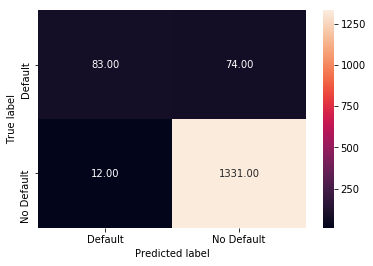

In [33]:
draw_cm( y_pred_df['Personal Loan'], y_pred_df.predicted )

In [34]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.94


In [35]:
#For Naive Bayes

dfNB = df.copy()

#Converting Age which is Continuous variable to Categorical, so that it can be used for MultinomialNB
dfNB['Age_Group'] = pd.cut(dfNB.Age, bins=[0,15,30,45,60,75], labels=[1,2,3,4,5])

#Converting Experience which is Continuous variable to Categorical, so that it can be used for MultinomialNB
dfNB['Experience_Group'] = pd.cut(dfNB.Experience, bins=[-10,0,10,20,30,40,50], labels=[0,1,2,3,4,5])

#Converting Income which is Continuous variable to Categorical, so that it can be used for MultinomialNB
dfNB['Income_Group'] = pd.cut(dfNB.Age, bins=[0,50,100,150,250,300], labels=[1,2,3,4,5])

#Converting ZIP which is Categorical variable to more sensible categories, so that it can be used for MultinomialNB
dfNB['ZIP_Group'] = pd.cut(dfNB['ZIP Code'], bins=[1000,90000,92000,94000,96000,98000,100000], labels=[1,2,3,4,5,6])

#Converting CCAvg which is Continuous variable to Categorical, so that it can be used for MultinomialNB
dfNB['CCAvg_Group'] = pd.cut(dfNB.CCAvg, bins=[-1,1,2,4,6,8,10], labels=[1,2,3,4,5,6])

#Converting Mortgage which is Continuous variable to Categorical, so that it can be used for MultinomialNB
dfNB['Mortgage_Group'] = pd.cut(dfNB.Mortgage, bins=[-1,1,150,300,450,600,750], labels=[1,2,3,4,5,6])

dfNB.isnull().values.any()

False

In [36]:
#Convert Categorical dtype to integer
dfNB['Age_Group'] = dfNB.Age_Group.cat.codes
dfNB['Experience_Group'] = dfNB.Experience_Group.cat.codes
dfNB['Income_Group'] = dfNB.Income_Group.cat.codes
dfNB['ZIP_Group'] = dfNB.ZIP_Group.cat.codes
dfNB['CCAvg_Group'] = dfNB.CCAvg_Group.cat.codes
dfNB['Mortgage_Group'] = dfNB.Mortgage_Group.cat.codes

In [37]:
# Transform data into features and target
nbColumns = ['Age_Group', 'Experience_Group', 'Income_Group', 'ZIP_Group', 'Family', 'CCAvg_Group', 'Education', 'Mortgage_Group',
              'Online', 'CreditCard']
X = dfNB[nbColumns]
Y = dfNB['Personal Loan']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [39]:
#Fit the Multinomial Naive Bayes Model with training data
multiNB = MultinomialNB().fit(X_train, y_train)

In [40]:
def get_predictions1(xx, yy, model):
    y_pred_df = pd.DataFrame( { 'actual': yy,
                               "predicted": model.predict( xx ) } )
    return y_pred_df

In [41]:
y_pred_df = get_predictions1(X_test, y_test, multiNB)
y_pred_df['Personal Loan'] = np.array(y_test)
y_pred_df[0:5]

,actual,predicted,Personal Loan
1501,0,0,0
2586,1,0,1
2653,0,0,0
1055,0,0,0
705,0,0,0


In [42]:
y_pred_df['predicted'] = y_pred_df.predicted.map( lambda x: 1 if x > 0.6 else 0)
y_pred_df[0:10]

,actual,predicted,Personal Loan
1501,0,0,0
2586,1,0,1
2653,0,0,0
1055,0,0,0
705,0,0,0
106,0,0,0
589,0,0,0
2468,0,0,0
2413,0,0,0
1600,0,0,0


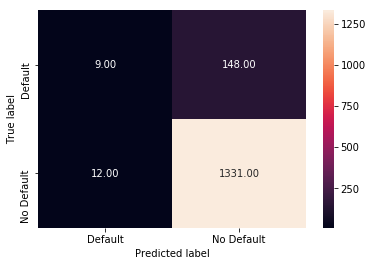

In [43]:
draw_cm( y_pred_df['Personal Loan'], y_pred_df.predicted )

In [44]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.89


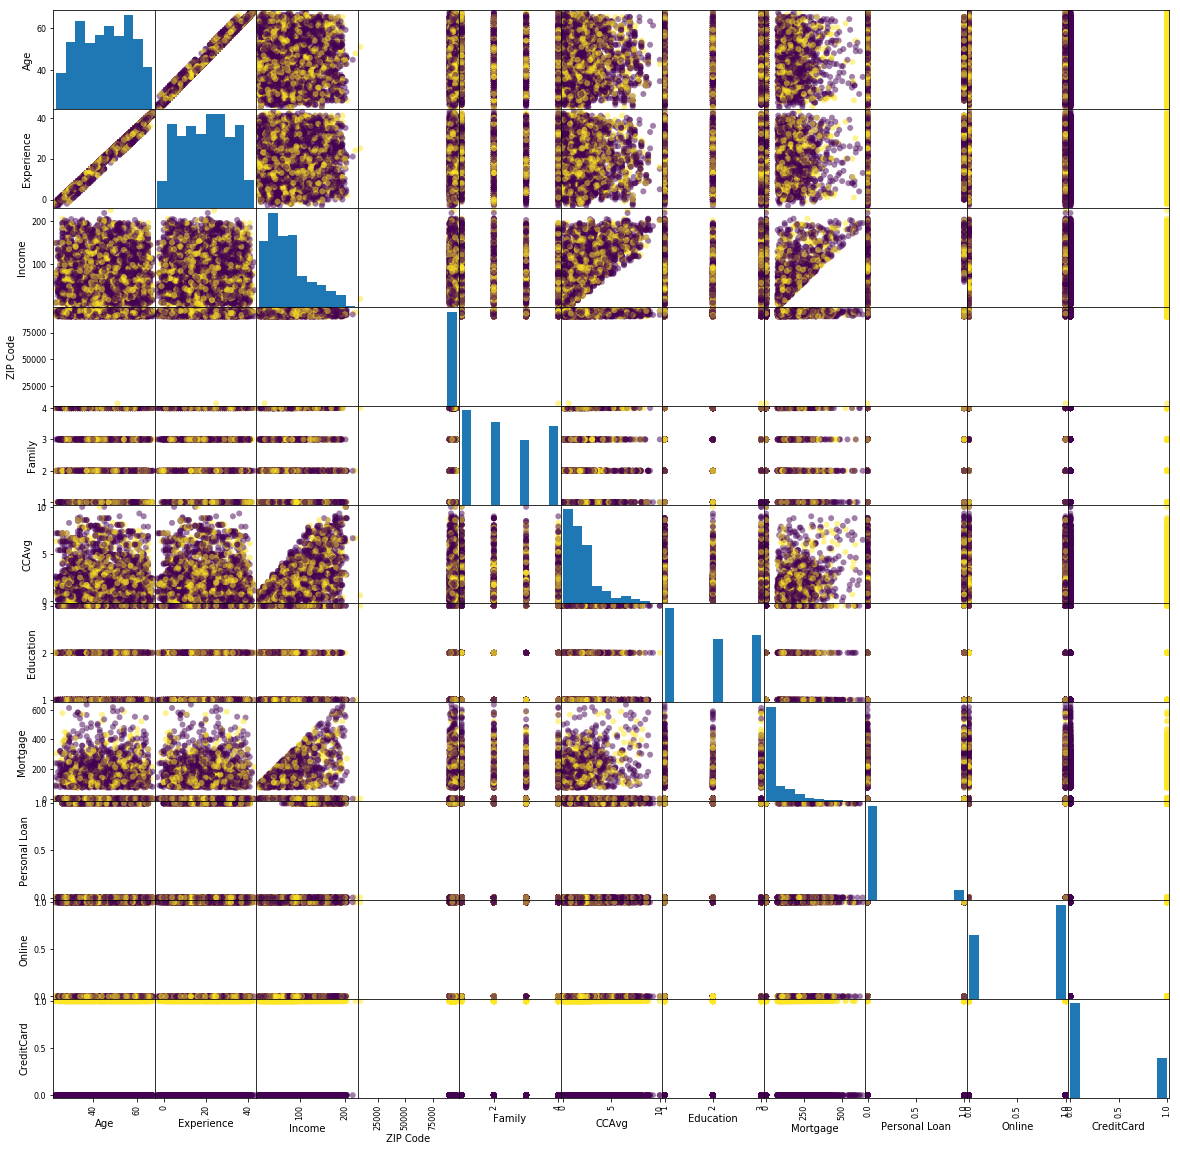

In [45]:
#For KNN

splt = pd.scatter_matrix(df, c=df.iloc[:,-1], figsize=(20, 20), marker='o')

In [46]:
# Transform data into features and target
vars = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Online', 'CreditCard']
X = np.array(df[vars])
Y = np.array(df['Personal Loan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [47]:
print(X_train.shape)
print(y_train.shape)

(3500, 10)
(3500,)


In [48]:
print(X_test.shape)
print(y_test.shape)

(1500, 10)
(1500,)


In [49]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.89
0.8993333333333333
0.8893333333333333


In [50]:
#Cross Validation
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [51]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5


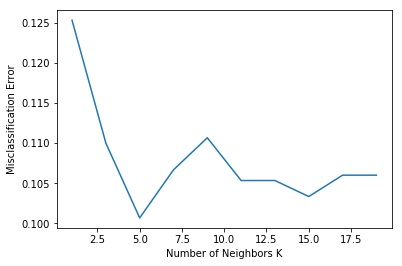

In [52]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [53]:
#confusion matrix

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

y_pred_df = get_predictions1(X_test, y_test, knn)
y_pred_df['Personal Loan'] = np.array(y_test)
y_pred_df[0:5]

,actual,predicted,Personal Loan
0,0,0,0
1,1,0,1
2,0,0,0
3,0,0,0
4,0,0,0


In [54]:
y_pred_df['predicted'] = y_pred_df.predicted.map( lambda x: 1 if x > 0.6 else 0)
y_pred_df[0:10]

,actual,predicted,Personal Loan
0,0,0,0
1,1,0,1
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


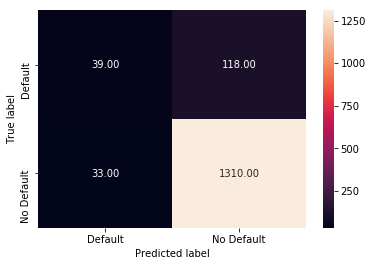

In [55]:
draw_cm( y_pred_df['Personal Loan'], y_pred_df.predicted )

- Logistic Regression works well because we need to find probability of customer getting Personal Loan. And we know     Logistic Regression is used when we need to figure probability
- Naive Bayes performs well when we have multiple classes and working with text classification
- KNN is used when we are dealing with class outputs

Our findigs support above statements:
- Logistic Regression: 0.94
- Naive Bayes: 0.89
- KNN: 0.8993

Hence, Logistic Regression is the best model in this use case.